In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
from scipy.special import expit
from scipy import interpolate
from scipy import integrate
from collections import Counter
from matplotlib.colors import ListedColormap

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('default')

import ABROCA

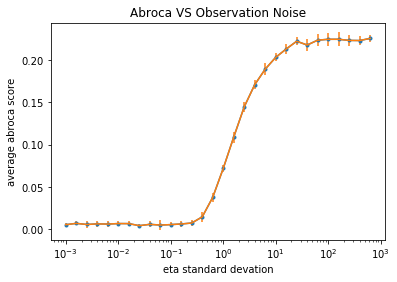

In [5]:
# observation noise vs. ABROCA plot example
avg_abrocas, eta_sds, errors = ABROCA.ABROCAvs_plot('obs_noise', [10**i for i in np.arange(-3,3,0.2)], s=13, n=[50000,50000])
plt.xscale('log')
plt.yscale('linear')
plt.plot(eta_sds, avg_abrocas, marker='.')
plt.errorbar(eta_sds, avg_abrocas, yerr=errors)
plt.xlabel('eta standard devation')
plt.ylabel('average abroca score')
plt.title('Abroca VS Observation Noise')

if len(eta_sds) < 10:
    for i, txt in enumerate(eta_sds):
        if i == 0:
            txt = f'e={txt}'
        plt.annotate(txt, (eta_sds[i], avg_abrocas[i]))
plt.show()

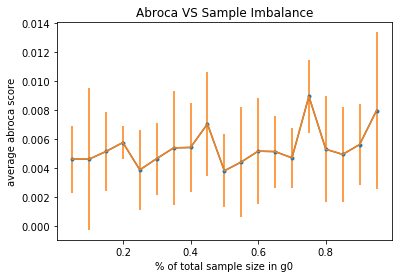

In [4]:
# sample imbalance vs. ABROCA plot example
avg_abrocas, g0_percent, errors = ABROCA.ABROCAvs_plot('sample_size', np.arange(.05,1.0,.05), s=13, n=[50000,50000])
plt.xscale('linear')
plt.yscale('linear')
plt.plot(g0_percent, avg_abrocas, marker='.')
plt.errorbar(g0_percent, avg_abrocas, yerr=errors)
plt.xlabel('% of total sample size in g0')
plt.ylabel('average abroca score')
plt.title('Abroca VS Sample Imbalance')

if len(g0_percent) < 10:
    for i, txt in enumerate(g0_percent):
        if i == 0:
            txt = f'e={txt}'
        plt.annotate(txt, (g0_percent[i], avg_abrocas[i]))
plt.show()

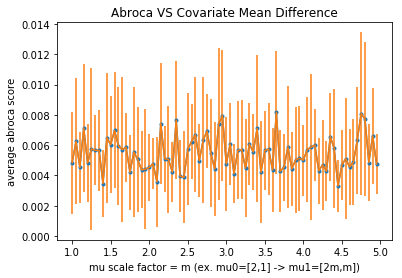

In [6]:
# covariate mean difference vs. ABROCA plot example
avg_abrocas, mu_scale, errors = ABROCA.ABROCAvs_plot('cov_means', np.arange(1,5,.05), s=13, n=[50000,50000])
plt.xscale('linear')
plt.yscale('linear')
plt.plot(mu_scale, avg_abrocas, marker='.')
plt.errorbar(mu_scale, avg_abrocas, yerr=errors)
plt.xlabel('mu scale factor = m (ex. mu0=[2,1] -> mu1=[2m,m])')
plt.ylabel('average abroca score')
plt.title('Abroca VS Covariate Mean Difference')

if len(mu_scale) < 10:
    for i, txt in enumerate(mu_scale):
        if i == 0:
            txt = f'e={txt}'
        plt.annotate(txt, (mu_scale[i], avg_abrocas[i]))
plt.show()